### Import Libararies

In [1]:
import requests
from urllib.request import urlretrieve
import pandas as pd
import re
from bs4 import BeautifulSoup
import time
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import collections
import numpy as np
import wordcloud
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn import metrics
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn import metrics

### Finding urls for the song of Rihanna

In [2]:
def findurls(artist):
    url = 'https://www.lyrics.com/artist.php?name={}&aid=704560&o=1'.format(artist)
    f = requests.get(url)
    text = f.text
    pattern = '/lyric/\d+/{}/[^\"]+'.format(artist)
    lyrics_links = re.findall(pattern, text)
    return lyrics_links

In [3]:
rihanna_urls = findurls('Rihanna')
rihanna_urls[:2]

['/lyric/21970335/Rihanna/A+Child+Is+Born',
 '/lyric/8792914/Rihanna/A+Girl+Like+Me']

### Creating separate text file for each song lyrics

In [4]:
def getsongs(lyrics_links,artist,folder):
    for i in lyrics_links:
        time.sleep(20)
        print(i)
        url = 'https://www.lyrics.com'+ str(i)
        # naming each file by song name 
        c = url.find(artist)
        songname = url[c+8:]
        filename = songname.replace('+'," ")
        f = requests.get(url)
        e = f.text
        file = open("{}{}.txt".format(folder,filename),"w",encoding="utf-8")
        file.write(e)
        file.close()

In [5]:
# getsongs(rihanna_urls,'Rihanna','data/')

### Cleaning of the extracted files

In [6]:
def cleandata(foldername,cleanfolder):
    
    all_txt_files = os.listdir(foldername)

    # loop over all text files and extracting only songs lyrics using Beautiful soap
    for num, i in enumerate(all_txt_files):
        try:
            data = open(foldername+i, encoding="utf-8")
            data1 = data.read()
           

            soup = BeautifulSoup(data1, "lxml")
            text = soup.find('pre')
            text1 = text.text
            file = open("{}{}_clean.txt".format(cleanfolder,i),"w",encoding="utf-8")
            file.write(text1)
            file.close()
        except AttributeError:
               print('error in file',i)

In [7]:
# cleandata('data/','data_clean/')

### Creation of dataframe

In [8]:
df = pd.DataFrame()
# pattern for selecting words having minimum length 3
pattern = '[^\w{3,}]'
lyrics = []
for filename in os.listdir('H:/Spiced academy/Week 4/cleandata/lyrics_classification'):
    if filename.endswith('.txt'):
        filename = 'H:/Spiced academy/Week 4/cleandata/lyrics_classification/' + filename
        with open(filename) as infile:
            all_lyrics = infile.read()
            all_words = re.sub(pattern, " ", all_lyrics.lower())
            lyrics.append(all_words)
df = pd.DataFrame({'lyrics' :lyrics})
df['Artist'] = 'Rihanna'
# df.rename(index=str, columns={0: "lyrics"},inplace=True)
df.head()

,lyrics,Artist
0,there could be a freak accident there could b...,Rihanna
1,"i heard about you you heard about me haha, ye...",Rihanna
2,come and put your name on it put your name on...,Rihanna
3,"yayo, yayo moo la lah yayo bitch better h...",Rihanna
4,breaking it off and setting it off in the real...,Rihanna


### Removing repeated lyrics

In [9]:
df['Consec_lyrics'] = df['lyrics'] == df.shift()['lyrics']
df2 = df[df['Consec_lyrics'] == False]
df2 = df2.drop(['Consec_lyrics'], axis=1)
df3 = df2[:99]

### Rihanna lyrics with all words having minimum three alphabets

In [10]:
rihanna_corpus = []
for i in df3['lyrics']:
    s = re.findall('\w{3,}', i)
    c = ' '.join(s)
    rihanna_corpus.append(c)
rihanna_corpus[:1]

['there could freak accident there could fatal disease know hate think about but real you and real you and could all fall down before our saviour could return know hate think about but real you and should hold hand should leave darling comfort please the earth could quake ruin could drift off our sleep know hate think about but real you and real you and the ocean crush the shore and take down forevermore know hate think about but real you and should hold hand should leave darling comfort please know hate think about but real you and real you and']

### Britney songs lyrics

Britney lyrics are collected from other participant doing lyrics extraction for Britney songs

In [12]:
df4 = pd.read_csv('britney.csv')
df4.head()

,Unnamed: 0,lyrics
0,0,"Oh yeah, yeah Last night I took a walk in the..."
1,1,"All around the world, pretty girls Wipe the f..."
2,2,It's love It's love Love... get busy Everybod...
3,3,"Oh baby, baby Oh baby, baby Oh baby, baby, ho..."
4,4,"Oh, oh-oh Oh, oh, oh-oh Friends say, I'm away..."


### Britney lyrics with all words having minimum three alphabets

In [13]:
Britney_corpus = []
for i in df4['lyrics']:
    s = re.findall('\w{3,}', i)
    c = ' '.join(s)
    Britney_corpus.append(c)
Britney_corpus[:1]

['yeah yeah Last night took walk the snow Couples holding hands places Seems like everyone but love Santa can you hear signed letter that sealed with kiss sent off and just said this know exactly what want this year Santa can you hear want baby baby want someone love Someone hold Maybe maybe maybe maybe You all own big red bow Santa can you hear have been good this year And all want one thing Tell true love near all want just for Underneath Christmas tree waiting here Santa that only wish this year yeah yeah Christmas Eve just can sleep Would wrong for taking peek Cause heard that you comin town Santa can you hear really hope that you your way With something special for your sleigh please make wish come true Santa can you hear want baby baby want someone love Someone hold Maybe maybe maybe maybe all alone under the mistletoe Santa can you hear have been good this year And all want one thing Tell true love near all want just for Underneath Christmas tree waiting here Santa that only wis

### Corpus of Rihanna and Britney songs

In [14]:
corpus = rihanna_corpus + Britney_corpus
len(corpus)

198

### Creating labels for songs

In [15]:
#Creating Label
labels_C = list('R'*99)
labels_B = list('B'*99) 
labelss= labels_C + labels_B
len(labelss)

198

### Wordcloud for Rihanaa

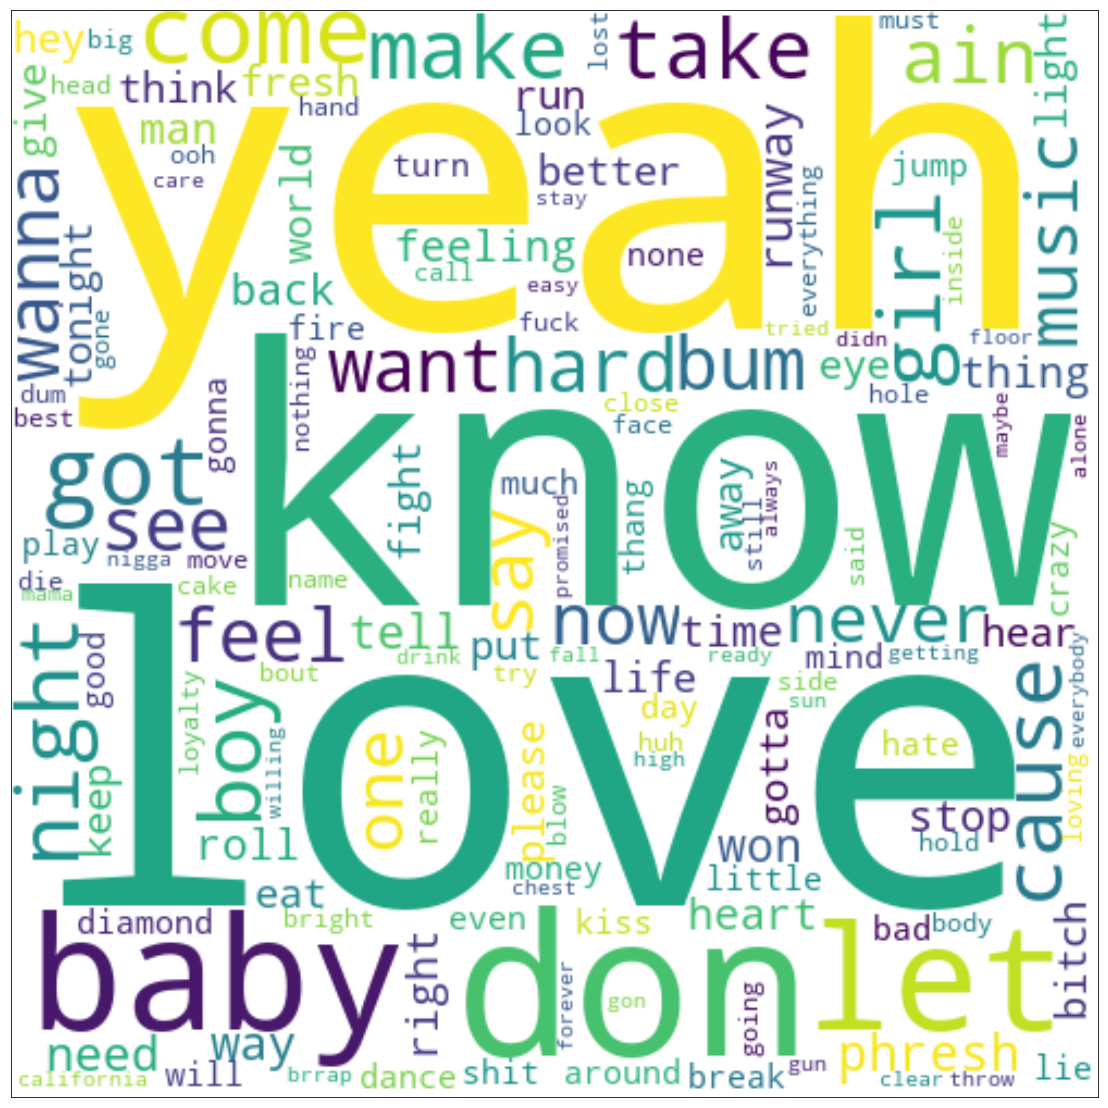

In [16]:
lyrics = str(rihanna_corpus)

mask = np.zeros((500, 500, 3), np.uint8)

mask.shape

#mask[150:350,50:350,:] = 255  # masked out area

cloud = wordcloud.WordCloud(background_color="white",
                max_words=150,
                mask=mask,
                collocations=False,  # calculates frequencies
                contour_color='steelblue').generate(lyrics) # <-- lyrics is a string
                # stop words are removed!

plt.figure(figsize = (20,20))
plt.imshow(cloud, interpolation='bilinear')
plt.savefig('Rihanna_wordcloud.png')
plt.xticks([])
plt.yticks([])
plt.show()

### Wordcloud for Britney

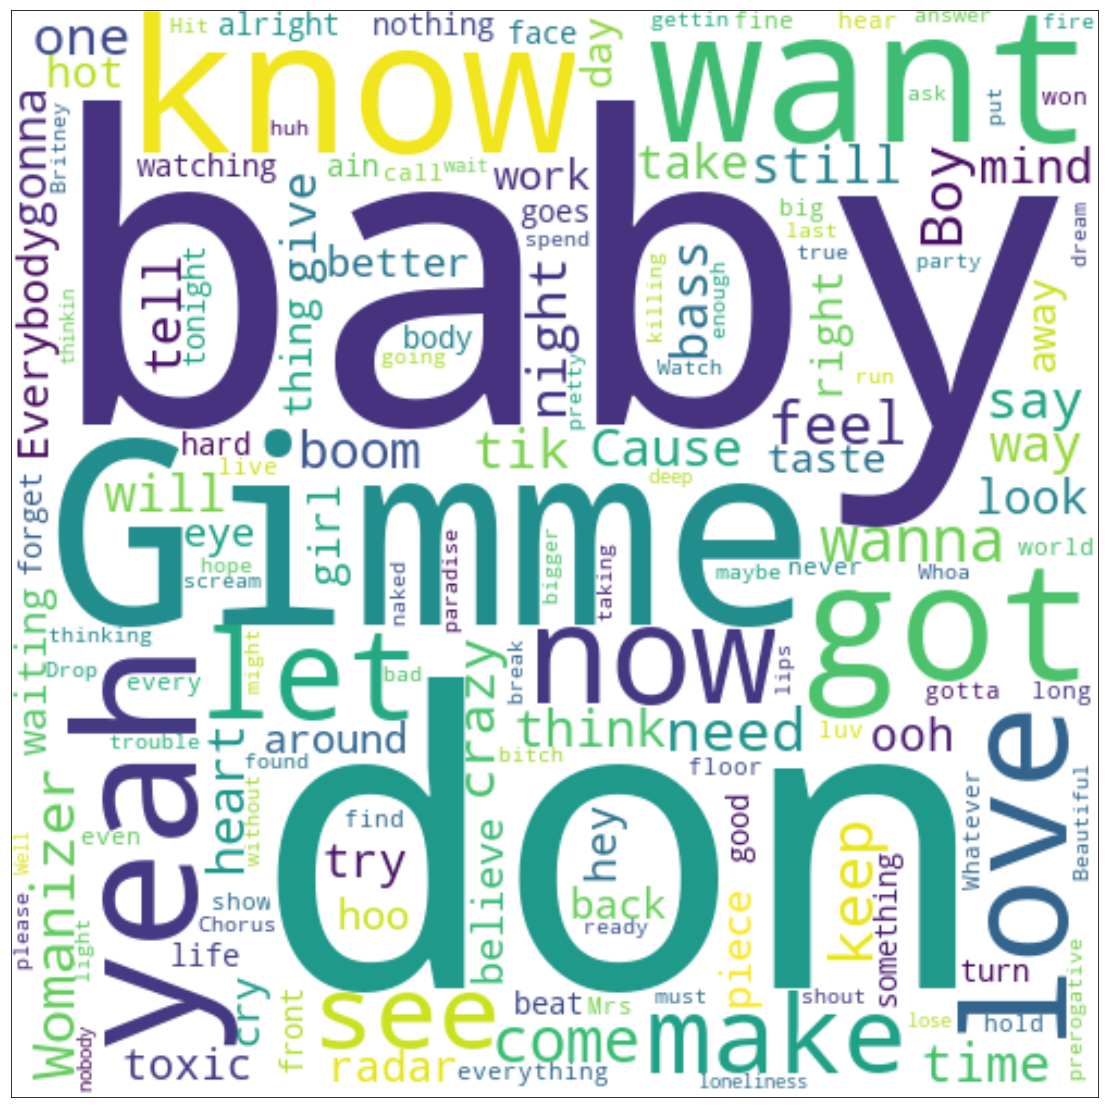

In [17]:
lyrics = str(Britney_corpus)

mask = np.zeros((500, 500, 3), np.uint8)

mask.shape

#mask[150:350,50:350,:] = 255  # masked out area

cloud = wordcloud.WordCloud(background_color="white",
                max_words=150,
                mask=mask,
                collocations=False,  # calculates frequencies
                contour_color='steelblue').generate(lyrics) # <-- lyrics is a string
                # stop words are removed!

plt.figure(figsize = (20,20))
plt.imshow(cloud, interpolation='bilinear')
plt.savefig('Rihanna_wordcloud.png')
plt.xticks([])
plt.yticks([])
plt.show()

### Top 20 most common words in Rihnna and Britney lyrics

In [18]:
songs = [rihanna_corpus,Britney_corpus]
for i,j in enumerate(songs):
    r = str(j).split()
    counts_words = Counter(r)
    word = counts_words.most_common(5)     
    print('most common words for {} are'.format(i),word) 

most common words for 0 are [('you', 1863), ('the', 1219), ('and', 690), ('that', 476), ('love', 452)]
most common words for 1 are [('you', 1554), ('the', 769), ('You', 504), ('can', 372), ('that', 336)]


### unique words in Rihanna and Britney lyrics

In [19]:
for i, j in enumerate(songs):
    words = word_tokenize(str(j))
    unique_tokens = set(words)
    print('unique words for {} are'.format(i), len(unique_tokens))
    

unique words for 0 are 2276
unique words for 1 are 2080


### words by the length of Alphabets

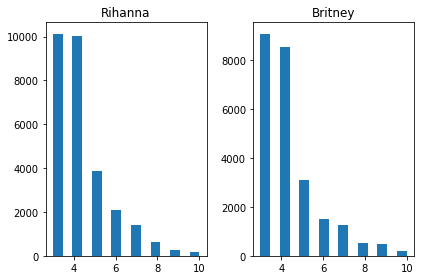

In [20]:
line_num_words_rihanna = [len(t_line.lower()) for t_line in word_tokenize(str(rihanna_corpus))]
line_num_words_britney = [len(t_line.lower()) for t_line in word_tokenize(str(Britney_corpus))]
length = [line_num_words_rihanna,line_num_words_britney]
labels = ['Rihanna','Britney']
for i in range (2):
    plt.subplot(1,2,i+1)
    plt.hist(length[i],bins=15, range=(3,10))
    plt.title(labels[i])
    plt.tight_layout()

### Removing bag of words

In [21]:
rihanna_tokenize = word_tokenize(str(rihanna_corpus))
brittney_tokenize = word_tokenize(str(Britney_corpus)) 
rihanna_lower = [t.lower() for t in rihanna_tokenize]
brittney_lower = [t.lower() for t in brittney_tokenize]

In [22]:
rihana_no_stop = [word for word in rihanna_lower if not word in stopwords.words('english')]
britny_no_stop = [word for word in brittney_lower if not word in stopwords.words('english')]

### Top 20 most common words in Rihnna and Britney lyrics after removing bag of words

In [23]:
no_stop = [rihana_no_stop,britny_no_stop]
for i,j in enumerate(no_stop):
    r = str(j).split()
    counts_words = Counter(r)
    word = counts_words.most_common(5)     
    print('most common words for {} are'.format(i),word)

most common words for 0 are [("'love',", 456), ("'yeah',", 425), ("'like',", 412), ("'know',", 314), ("'baby',", 295)]
most common words for 1 are [("'baby',", 379), ("'gim',", 305), ("'know',", 298), ("'like',", 293), ("'want',", 282)]


### Countvectorizer, tfidf and Naive Bayes

In [24]:
m = CountVectorizer(stop_words= 'english')

m.fit(corpus)

matrix = m.fit_transform(corpus)
index = list(sorted(m.vocabulary_.keys()))

df_Total = pd.DataFrame(matrix.todense(), columns = index).T.sort_values(by = 0, ascending = False)
df_Total.head()

,0,1,2,3,4,5,6,7,8,9,...,188,189,190,191,192,193,194,195,196,197
real,8,2,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
think,5,0,0,3,0,6,5,0,0,0,...,0,0,0,0,2,0,0,0,5,1
know,5,7,2,2,12,7,7,0,0,1,...,0,3,0,0,0,5,6,9,9,0
hate,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hand,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
tf = TfidfTransformer()
vec = tf.fit_transform(matrix)
vec.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
X= vec
y = labelss

In [27]:
mc = MultinomialNB()
mc.fit(X, y)

mc.score(X, y)

0.9949494949494949

### test dataset

In [28]:
test = rihanna_corpus[80:95] + Britney_corpus[120:135]

In [29]:
test_wordd2vec = m.transform(test)
test_vec = tf.transform(test_wordd2vec)


In [30]:
mc.predict(test_vec)

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R'], dtype='<U1')

In [31]:
mc.predict_proba(test_vec)

array([[0.23520528, 0.76479472],
       [0.28609837, 0.71390163],
       [0.27862471, 0.72137529],
       [0.37460193, 0.62539807],
       [0.39206121, 0.60793879],
       [0.20396962, 0.79603038],
       [0.40331438, 0.59668562],
       [0.33144246, 0.66855754],
       [0.43434638, 0.56565362],
       [0.43443436, 0.56556564],
       [0.3181851 , 0.6818149 ],
       [0.35374244, 0.64625756],
       [0.20696145, 0.79303855],
       [0.20191156, 0.79808844],
       [0.29316448, 0.70683552]])

### Features most disciminating

In [32]:
one = mc.feature_log_prob_[0] 
two = mc.feature_log_prob_[1]

diff = one - two

import pandas as pd

df = pd.DataFrame(diff, index= list(sorted(m.vocabulary_.keys())) ).sort_values(by=0, ascending=False)
df[:10]

,0
toxic,1.499589
gimme,1.461387
womanizer,1.341678
chorus,1.058178
believe,1.030858
taste,1.022945
loneliness,0.963271
prerogative,0.864600
comes,0.820646
alright,0.801469


### Text classification with test and train split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(corpus, y, test_size=0.33, random_state=42)

count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])


['143', '150', '911', 'abandoning', 'aboard', 'abuse', 'accident', 'account', 'aching', 'act']


### TfidfVectorizer for text classification

In [34]:
# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09040365 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


### Vectors inspection

In [35]:
# CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

print(count_df.head(3))

print(tfidf_df.head(3))

# difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

   143  150  911  abandoning  aboard  abuse  accident  account  aching  act  \
0    0    0    0           0       0      0         0        0       0    0   
1    0    1    0           0       0      0         0        0       0    0   
2    0    0    0           0       0      0         0        0       0    0   

   ...  ying  yoga  young  youâ  yuh  yup  zero  zone  zooped  zum  
0  ...     0     0      0     0    0    0     0     0       0    0  
1  ...     0     0      0     0    0    0     0     0       0    0  
2  ...     0     0      0     0    0    0     0     0       0    0  

[3 rows x 2169 columns]
   143       150  911  abandoning  aboard  abuse  accident  account  aching  \
0  0.0  0.000000  0.0         0.0     0.0    0.0       0.0      0.0     0.0   
1  0.0  0.090404  0.0         0.0     0.0    0.0       0.0      0.0     0.0   
2  0.0  0.000000  0.0         0.0     0.0    0.0       0.0      0.0     0.0   

   act  ...  ying  yoga  young  youâ  yuh  yup  zero  zone  zoope

### Training and testing with countvectorizer

In [36]:
mc.fit(count_train, y_train)

# Create the predicted tags: pred
pred = mc.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)


0.6363636363636364


In [37]:
# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['B', 'R'])
print(cm)

[[19 13]
 [11 23]]


### training and testing with Tfidfvectorizer

In [38]:
# Fit the classifier to the training data
mc.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = mc.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['B', 'R'])
print(cm)

0.6515151515151515
[[21 11]
 [12 22]]


### Improving the model by selecting alpha

In [39]:
# Create the list of alphas: alphas
alphas = np.arange(0, 1, .1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    mc = MultinomialNB(alpha=alpha)
    # Fit to the training data
    mc.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = mc.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score
# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.696969696969697

Alpha:  0.1
Score:  0.6363636363636364

Alpha:  0.2
Score:  0.6515151515151515

Alpha:  0.30000000000000004
Score:  0.6515151515151515

Alpha:  0.4
Score:  0.6515151515151515

Alpha:  0.5
Score:  0.6515151515151515

Alpha:  0.6000000000000001
Score:  0.6363636363636364

Alpha:  0.7000000000000001
Score:  0.6363636363636364

Alpha:  0.8
Score:  0.6363636363636364

Alpha:  0.9
Score:  0.6363636363636364



C:\Users\rai\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
